In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
tol = 1e-6
K = 1
L = 4
epsilon_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)
eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']

In [3]:
def shoot2(psi, x, epsilon):
    return [psi[1], (K * x**2 - epsilon) * psi[0]]

[[2.56183728e-04 1.45464943e-03 5.66850441e-03 1.74888353e-02
  4.54186532e-02]
 [3.76941341e-04 2.08382040e-03 7.88887263e-03 2.35797300e-02
  5.90957569e-02]
 [5.51715411e-04 2.96908204e-03 1.09182923e-02 3.16106587e-02
  7.64371684e-02]
 [8.01216856e-04 4.19597703e-03 1.49822215e-02 4.19964147e-02
  9.79253463e-02]
 [1.15311773e-03 5.87372070e-03 2.03519887e-02 5.51929320e-02
  1.23987557e-01]
 [1.64382865e-03 8.13910263e-03 2.73454574e-02 7.16775557e-02
  1.54932416e-01]
 [2.32056133e-03 1.11602386e-02 3.63245925e-02 9.19203654e-02
  1.90875612e-01]
 [3.24364690e-03 1.51397599e-02 4.76887132e-02 1.16345429e-01
  2.31657881e-01]
 [4.48904980e-03 2.03169168e-02 6.18621987e-02 1.45281709e-01
  2.76760793e-01]
 [6.15097686e-03 2.69679639e-02 7.92755343e-02 1.78904506e-01
  3.25228447e-01]
 [8.34443378e-03 3.54041083e-02 1.00338843e-01 2.17169753e-01
  3.75605576e-01]
 [1.12075293e-02 4.59662523e-02 1.25407526e-01 2.59745227e-01
  4.25904255e-01]
 [1.49032728e-02 5.90157740e-02 1.547403

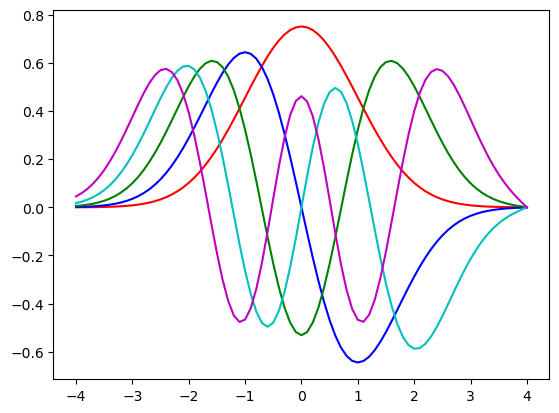

In [4]:
for modes in range(1, 6): 
    epsilon = epsilon_start 
    depsilon = 0.1
    for _ in range(1000):
        x0 = [1, np.sqrt(L**2 - epsilon)]
        y = odeint(shoot2, x0, xspan, args=(epsilon,)) 
        if abs(np.sqrt(L**2 - epsilon) * y[-1,0]) < tol:  
            eigenvalues.append(epsilon)
            norm = np.trapz(y[:, 0] * y[:, 0], xspan)
            eigenfunctions.append(np.abs(y[:, 0] / np.sqrt(norm)))
            break  

        if (-1) ** (modes + 1) * y[-1, 0] > 0:
            epsilon += depsilon
        else:
            epsilon -= depsilon / 2
            depsilon /= 2
    
    epsilon_start = epsilon + 0.1  
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, y[:, 0] / np.sqrt(norm), col[modes-1]) 

A2 = eigenvalues
A1_array = np.array(eigenfunctions)
A1 = A1_array.reshape(5,-1).T

print(A1)
print(A2)
plt.show()